In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_excel('psit_elite.xlsx', header=3)
df = dataset
df.head()

,Candidate Id,Candidate Name,S. No.,Name,Roll no,Branch,Section,Mobile no,Candidate Email,Copy Paste Frequency,...,N,C,S,N.1,A N,C.1,A C,S.1,A S,Final Score (200)
0,95522588,NaN,1,Aryan Sahu,2301641520047,CS AI,A,8957568005,2k23.csai2310566@gmail.com,0,...,50.0,75.0,51.0,NaN,176.0,NaN,176.0,NaN,176.0,176.0
1,95523041,NaN,2,Aryan Chakraverti,2301641520046,CS AI,A,9336812287,rajschoolrmps@gmail.com,0,...,50.0,75.0,51.0,NaN,176.0,138.5,138.5,NaN,138.5,138.5
2,95518234,NaN,3,Sachin Yadav,2301641520152,CS AI,B,6386835013,2k23.csai2310567@gmail.com,0,...,50.0,75.0,10.0,NaN,135.0,NaN,135.0,NaN,135.0,135.0
3,95522229,NaN,4,Naina Mishra,2301641530114,CS AIML,B,7317017503,nainamishra070@gmail.com,0,...,50.0,75.0,9.0,NaN,134.0,NaN,134.0,129.5,129.5,129.5
4,95518547,NaN,5,Suryansh Sharan,2311792,EC,B,7654545837,suryansh123.sharan@gmail.com,0,...,50.0,75.0,3.0,NaN,128.0,NaN,128.0,NaN,128.0,128.0


In [3]:
df.drop(['Candidate Id','Candidate Name','Copy Paste Frequency','N','C','S','N.1'], axis=1,inplace=True)

In [4]:
df.drop(['Mobile no','Max Score','Ip Address','Attempt Count','S.1','A C','C.1'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   S. No.                               695 non-null    int64  
 1   Name                                 695 non-null    object 
 2   Roll no                              695 non-null    object 
 3   Branch                               695 non-null    object 
 4   Section                              657 non-null    object 
 5   Candidate Email                      695 non-null    object 
 6   Attempt Activity Suspicion Severity  154 non-null    object 
 7   Attempt Activity Suspicion Score     154 non-null    float64
 8   Attempt Activity Reasons             154 non-null    object 
 9   Overall Suspicion Severity           154 non-null    object 
 10  Attempt Time Taken (seconds)         695 non-null    int64  
 11  Number Of Window Exits          

In [6]:
df.drop('Candidate Email', axis=1, inplace=True)

In [7]:
df.head()

,S. No.,Name,Roll no,Branch,Section,Attempt Activity Suspicion Severity,Attempt Activity Suspicion Score,Attempt Activity Reasons,Overall Suspicion Severity,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Attempt Plagiarism,Score,A N,A S,Final Score (200)
0,1,Aryan Sahu,2301641520047,CS AI,A,NaN,NaN,NaN,NaN,5471,0,0,No,176,176.0,176.0,176.0
1,2,Aryan Chakraverti,2301641520046,CS AI,A,MEDIUM,6.0,Coding Patterns (Potential reference taking),MEDIUM,5241,0,0,Yes,176,176.0,138.5,138.5
2,3,Sachin Yadav,2301641520152,CS AI,B,NaN,NaN,NaN,NaN,5974,0,0,No,135,135.0,135.0,135.0
3,4,Naina Mishra,2301641530114,CS AIML,B,MEDIUM,5.0,Coding Patterns (Potential reference taking),MEDIUM,5728,1,6,Yes,134,134.0,129.5,129.5
4,5,Suryansh Sharan,2311792,EC,B,NaN,NaN,NaN,NaN,1298,1,40,No,128,128.0,128.0,128.0


In [8]:
df['Attempt Activity Suspicion Severity'].value_counts()

Attempt Activity Suspicion Severity
MEDIUM    102
HIGH       52
Name: count, dtype: int64

In [9]:
df['Attempt Activity Reasons'].value_counts()

Attempt Activity Reasons
Coding Patterns (External copy paste)                                67
Coding Patterns (Potential reference taking)                         55
Coding Patterns                                                      19
Coding Patterns (External copy paste, Potential reference taking)    13
Name: count, dtype: int64

In [10]:
df[(df['Attempt Activity Reasons']=='Coding Patterns (External copy paste, Potential reference taking)')&(df['S. No.'] <= 180)]

,S. No.,Name,Roll no,Branch,Section,Attempt Activity Suspicion Severity,Attempt Activity Suspicion Score,Attempt Activity Reasons,Overall Suspicion Severity,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Attempt Plagiarism,Score,A N,A S,Final Score (200)
6,7,Devanshi Arora,2301641530065,CS AIML,A,HIGH,9.0,"Coding Patterns (External copy paste, Potentia...",HIGH,5497,17,367,Yes,131,131.0,125.0,125.0
53,54,Divyansh Vijay,2301641520071,CS AI,A,HIGH,8.0,"Coding Patterns (External copy paste, Potentia...",HIGH,5735,2,26,Yes,114,114.0,75.0,75.0
179,180,KALPIT YADAV,2301641530085,CS AIML,B,HIGH,9.0,"Coding Patterns (External copy paste, Potentia...",HIGH,5786,9,156,Yes,125,125.0,50.0,50.0


In [11]:
df['Attempt Activity Suspicion Severity']=df['Attempt Activity Suspicion Severity'].fillna('Fare')

<Axes: xlabel='Attempt Activity Suspicion Severity', ylabel='count'>

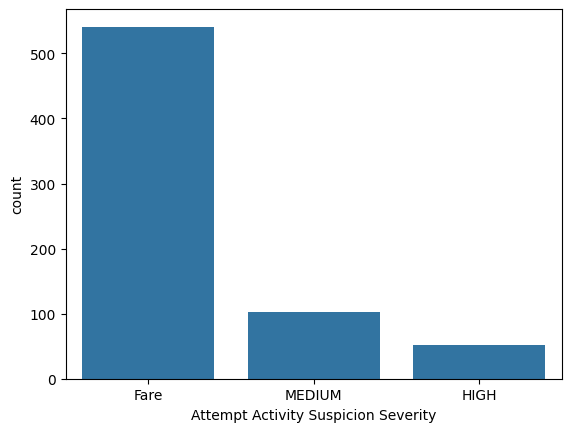

In [12]:
sns.countplot(x='Attempt Activity Suspicion Severity', data=df)

In [13]:
df.head()

,S. No.,Name,Roll no,Branch,Section,Attempt Activity Suspicion Severity,Attempt Activity Suspicion Score,Attempt Activity Reasons,Overall Suspicion Severity,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Attempt Plagiarism,Score,A N,A S,Final Score (200)
0,1,Aryan Sahu,2301641520047,CS AI,A,Fare,NaN,NaN,NaN,5471,0,0,No,176,176.0,176.0,176.0
1,2,Aryan Chakraverti,2301641520046,CS AI,A,MEDIUM,6.0,Coding Patterns (Potential reference taking),MEDIUM,5241,0,0,Yes,176,176.0,138.5,138.5
2,3,Sachin Yadav,2301641520152,CS AI,B,Fare,NaN,NaN,NaN,5974,0,0,No,135,135.0,135.0,135.0
3,4,Naina Mishra,2301641530114,CS AIML,B,MEDIUM,5.0,Coding Patterns (Potential reference taking),MEDIUM,5728,1,6,Yes,134,134.0,129.5,129.5
4,5,Suryansh Sharan,2311792,EC,B,Fare,NaN,NaN,NaN,1298,1,40,No,128,128.0,128.0,128.0


<Axes: xlabel='Branch ', ylabel='count'>

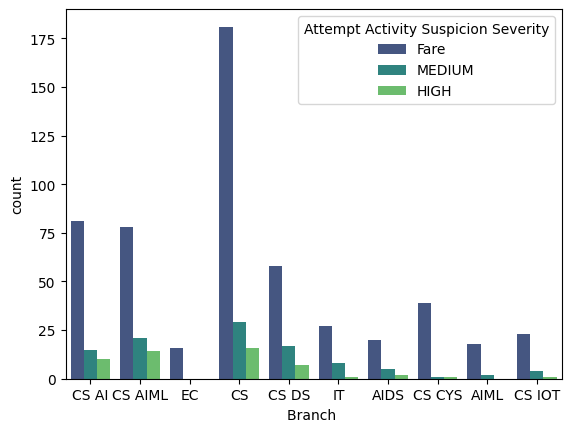

In [14]:
sns.countplot(x='Branch ',hue='Attempt Activity Suspicion Severity',data=df, palette='viridis')

In [15]:
print(df['Final Score (200)'].mean())
print(df['Final Score (200)'].mode())
print(df['Final Score (200)'].median())

29.87769784172662
0    50.0
Name: Final Score (200), dtype: float64
14.0


In [16]:
df.loc[117]

S. No.                                            118
Name                                   Tanishq Mishra
Roll no                                 2301640100404
Branch                                             CS
Section                                             G
Attempt Activity Suspicion Severity              Fare
Attempt Activity Suspicion Score                  NaN
Attempt Activity Reasons                          NaN
Overall Suspicion Severity                        NaN
Attempt Time Taken (seconds)                     5622
Number Of Window Exits                              0
Out Of Window Duration (seconds)                    0
Attempt Plagiarism                                 No
Score                                              58
A N                                              58.0
A S                                              58.0
Final Score (200)                                58.0
Name: 117, dtype: object

In [17]:
df.describe()

,S. No.,Attempt Activity Suspicion Score,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Score,A N,A S,Final Score (200)
count,695.000000,154.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000
mean,348.000000,6.857143,5324.402878,3.677698,113.365468,34.151079,32.384892,29.877698,29.877698
std,200.773504,1.510004,620.781158,9.519872,330.987678,34.937638,33.931037,30.815994,30.815994
min,1.000000,5.000000,489.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,174.500000,5.250000,5228.500000,0.000000,0.000000,5.000000,5.000000,4.000000,4.000000
50%,348.000000,7.000000,5465.000000,0.000000,0.000000,17.000000,15.000000,14.000000,14.000000
75%,521.500000,8.000000,5644.500000,2.000000,26.000000,56.000000,53.000000,51.000000,51.000000
max,695.000000,10.000000,5999.000000,94.000000,3446.000000,176.000000,176.000000,176.000000,176.000000


In [18]:
df.loc[6]

S. No.                                                                                 7
Name                                                                      Devanshi Arora
Roll no                                                                    2301641530065
Branch                                                                           CS AIML
Section                                                                                A
Attempt Activity Suspicion Severity                                                 HIGH
Attempt Activity Suspicion Score                                                     9.0
Attempt Activity Reasons               Coding Patterns (External copy paste, Potentia...
Overall Suspicion Severity                                                          HIGH
Attempt Time Taken (seconds)                                                        5497
Number Of Window Exits                                                                17
Out Of Window Duratio

In [19]:
df[df['Name']=='vedant shukla']

,S. No.,Name,Roll no,Branch,Section,Attempt Activity Suspicion Severity,Attempt Activity Suspicion Score,Attempt Activity Reasons,Overall Suspicion Severity,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Attempt Plagiarism,Score,A N,A S,Final Score (200)


In [20]:
df.loc[26]

S. No.                                                                           27
Name                                                                  rahul awasthi
Roll no                                                               2301641630052
Branch                                                                         AIDS
Section                                                                           A
Attempt Activity Suspicion Severity                                          MEDIUM
Attempt Activity Suspicion Score                                                5.0
Attempt Activity Reasons               Coding Patterns (Potential reference taking)
Overall Suspicion Severity                                                   MEDIUM
Attempt Time Taken (seconds)                                                   4949
Number Of Window Exits                                                           94
Out Of Window Duration (seconds)                                            

In [21]:
df.loc[84]

S. No.                                             85
Name                                   Govind Jaiswal
Roll no                                 2301641630025
Branch                                           AIDS
Section                                           NaN
Attempt Activity Suspicion Severity              Fare
Attempt Activity Suspicion Score                  NaN
Attempt Activity Reasons                          NaN
Overall Suspicion Severity                        NaN
Attempt Time Taken (seconds)                     5228
Number Of Window Exits                              3
Out Of Window Duration (seconds)                   47
Attempt Plagiarism                                 No
Score                                              68
A N                                              68.0
A S                                              68.0
Final Score (200)                                68.0
Name: 84, dtype: object

In [22]:
df.loc[354]

S. No.                                           355
Name                                   Rohan Dwivedi
Roll no                                2301641630054
Branch                                          AIDS
Section                                          NaN
Attempt Activity Suspicion Severity             Fare
Attempt Activity Suspicion Score                 NaN
Attempt Activity Reasons                         NaN
Overall Suspicion Severity                       NaN
Attempt Time Taken (seconds)                    5711
Number Of Window Exits                             0
Out Of Window Duration (seconds)                   0
Attempt Plagiarism                                No
Score                                             13
A N                                             13.0
A S                                             13.0
Final Score (200)                               13.0
Name: 354, dtype: object

In [23]:
df.loc[84]

S. No.                                             85
Name                                   Govind Jaiswal
Roll no                                 2301641630025
Branch                                           AIDS
Section                                           NaN
Attempt Activity Suspicion Severity              Fare
Attempt Activity Suspicion Score                  NaN
Attempt Activity Reasons                          NaN
Overall Suspicion Severity                        NaN
Attempt Time Taken (seconds)                     5228
Number Of Window Exits                              3
Out Of Window Duration (seconds)                   47
Attempt Plagiarism                                 No
Score                                              68
A N                                              68.0
A S                                              68.0
Final Score (200)                                68.0
Name: 84, dtype: object

In [24]:
df.loc[6]

S. No.                                                                                 7
Name                                                                      Devanshi Arora
Roll no                                                                    2301641530065
Branch                                                                           CS AIML
Section                                                                                A
Attempt Activity Suspicion Severity                                                 HIGH
Attempt Activity Suspicion Score                                                     9.0
Attempt Activity Reasons               Coding Patterns (External copy paste, Potentia...
Overall Suspicion Severity                                                          HIGH
Attempt Time Taken (seconds)                                                        5497
Number Of Window Exits                                                                17
Out Of Window Duratio

In [27]:
df.loc[df['Name']=="Abhay Tiwari"]

,S. No.,Name,Roll no,Branch,Section,Attempt Activity Suspicion Severity,Attempt Activity Suspicion Score,Attempt Activity Reasons,Overall Suspicion Severity,Attempt Time Taken (seconds),Number Of Window Exits,Out Of Window Duration (seconds),Attempt Plagiarism,Score,A N,A S,Final Score (200)
310,311,Abhay Tiwari,2301640100010,CS,A,Fare,NaN,NaN,NaN,5293,0,0,No,21,21.0,21.0,21.0
527,528,Abhay Tiwari,2301641630003,AIDS,NaN,Fare,NaN,NaN,NaN,5107,0,0,No,4,4.0,4.0,4.0
